In [1]:
import sys

sys.path.append('..')

In [2]:
import numpy as np
from utility import LinearDataGenerator2D
from utility import generate_samples_with_uncertainty
from utility import select_random_data_partition
from utility import fit_regression_model
from utility import regressor_prediction

In [3]:
import matplotlib.pyplot as plt 

In [4]:
generator_fn = LinearDataGenerator2D(slope=1., intercept=0.)

In [5]:
result = generate_samples_with_uncertainty(number_of_samples=15,
                                           base_function=generator_fn,
                                           uncertainty=2.5,
                                           seed=42)

In [6]:
xy_true = result['true_observation']
xy_observed = result['noisy_observation']

In [16]:
partitions = select_random_data_partition(15, [3, 4, 10], seed=121)
models = list()

for part in partitions:
    x_, y_ = xy_observed[part, :1], xy_observed[part, 1]
    reg = fit_regression_model(x_, y_, model_type='sgd-regressor')
    models.append(reg)

In [17]:
predictions = []
x = xy_observed[:, :1]
for model in models:
    predictions.append( np.concatenate([x, regressor_prediction(model, x)[..., np.newaxis]], axis=1))

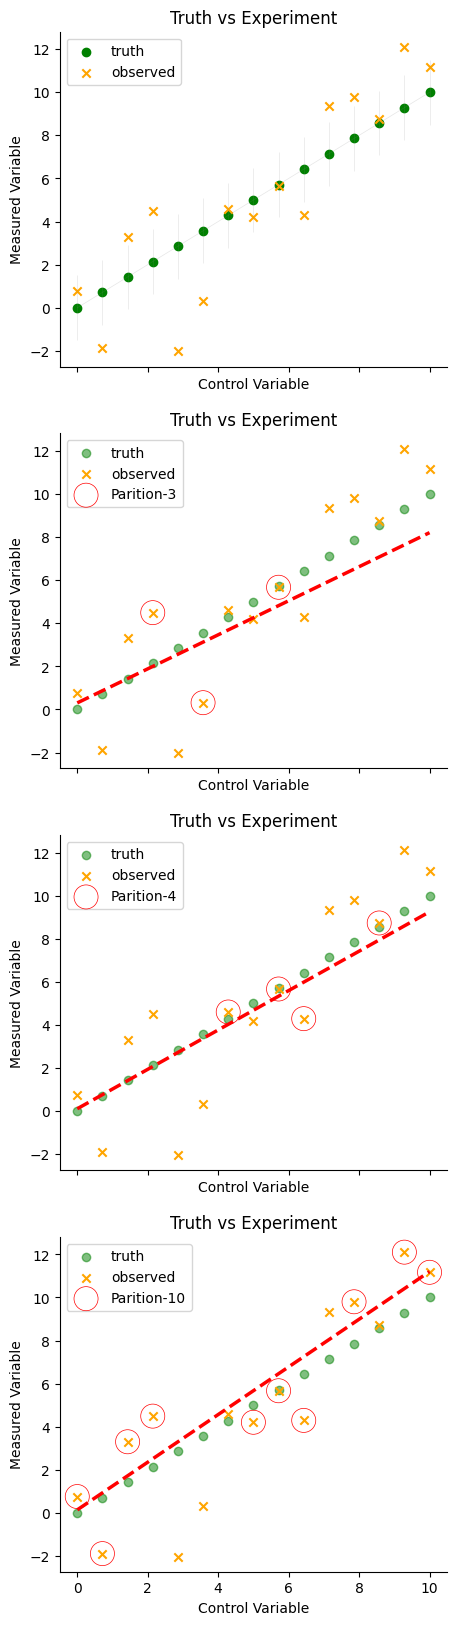

In [18]:
fig, axs = plt.subplots(1+len(partitions), 1, sharey='col', sharex='col', figsize=(5, 20))
axs[0].scatter(xy_true[:, 0], xy_true[:, 1], marker='o', color='green', label='truth')
axs[0].scatter(xy_observed[:, 0], xy_observed[:, 1], marker='x', color='orange', label='observed')
axs[0].legend()
axs[0].errorbar(xy_true[:, 0], xy_true[:, 1], yerr=1.5, linewidth=0.5, color='gray', alpha=0.2)

for i, part in enumerate(partitions):
    axs[1+i].scatter(xy_true[:, 0], xy_true[:, 1], marker='o', color='green', label='truth', alpha=0.5)
    axs[1+i].scatter(xy_observed[:, 0], xy_observed[:, 1], marker='x', color='orange', label='observed')
    axs[1 + i].scatter(xy_observed[part, 0], 
                   xy_observed[part, 1], 
                   marker='o', 
                   s=300,
                   color='red', 
                   label=f'Parition-{len(part)}',
                   linewidth=0.5,
                   facecolor='none')
    axs[1+i].plot(predictions[i][:, 0],
                  predictions[i][:, 1],
                  color='red',
                  linewidth=2.5,
                  linestyle='dashed')
    axs[1 + i].legend()

for ax in axs.flat:
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    ax.set_title(f'Truth vs Experiment', fontsize=12)
    ax.set_xlabel(f'Control Variable')
    ax.set_ylabel(f'Measured Variable')
plt.show()